<a href="https://colab.research.google.com/github/grecalde17gh/pln-lstm-stock-prediction/blob/main/Portafolio_de_inversiones_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto FINAL | Gustavo Recalde**

# **Optimizaci√≥n de Portafolios de Inversi√≥n usando Redes LSTM y PLN**


## **Dependencias y librerias**

In [1]:
!pip install pytorch-lightning
!pip install vaderSentiment
!pip install praw
!pip install asyncpraw

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 815.2/815.2 kB 11.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 869.2/869.2 kB 14.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 kB 2.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 191.0/191.0 kB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 196.7/196.7 kB 5.1 MB/s eta 0:00:00


### Librerias

In [2]:
# Importar librer√≠as y configurar la semilla
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize
import os

# Configuraci√≥n de la semilla para reproducibilidad
np.random.seed(4)
torch.manual_seed(4)


## **Recolecci√≥n y Procesamiento de Datos**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Datos para AMZN descargados.
Datos para GOOGL descargados.
Datos para NVDA descargados.
Datos para AAPL descargados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Datos para NFLX descargados.
Datos para GME descargados.


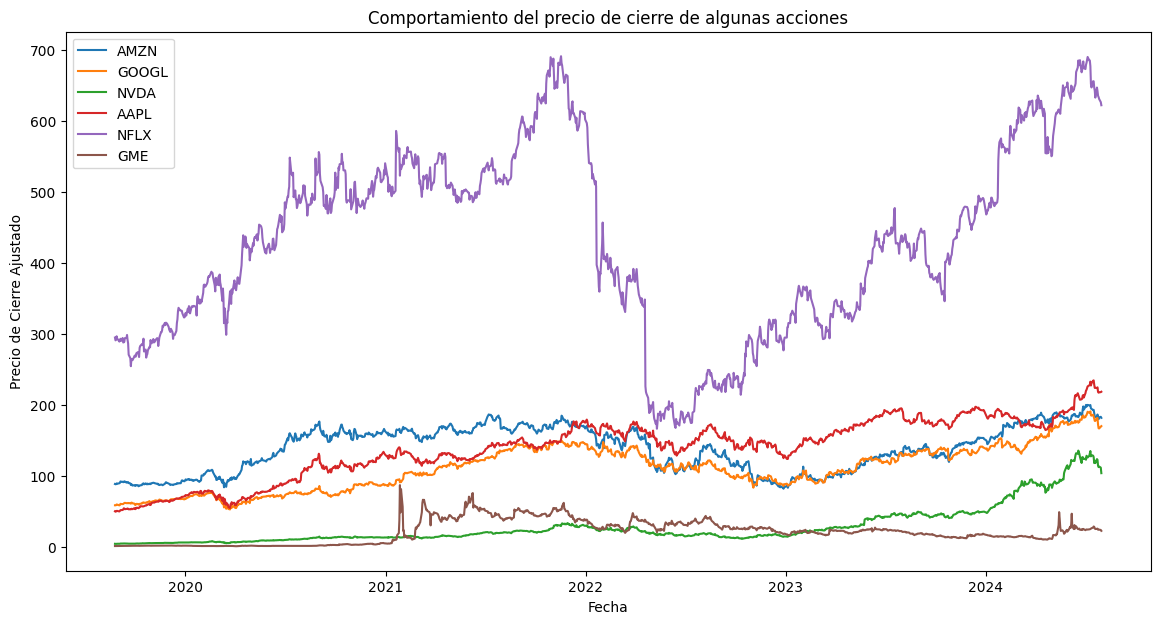

In [26]:
# Recolecci√≥n y procesamiento de datos

# Lista de tickers
tickers = ['AMZN', 'GOOGL', 'NVDA', 'AAPL', 'NFLX','GME']

# Descargar datos de Yahoo Finance para cada ticker
def download_data(ticker):
    data = yf.download(ticker, start='2019-06-01', end='2024-07-31')
    data['MA_10'] = data['Adj Close'].rolling(window=10).mean()
    data['MA_30'] = data['Adj Close'].rolling(window=30).mean()
    data['MA_60'] = data['Adj Close'].rolling(window=60).mean()
    data.dropna(inplace=True)  # Eliminar filas con valores NaN debido al c√°lculo de medias m√≥viles
    return data

# Descargar y almacenar datos para cada ticker
data_dict = {}
for ticker in tickers:
    data_dict[ticker] = download_data(ticker)
    print(f"Datos para {ticker} descargados.")

# Graficar el comportamiento del precio de cierre ajustado de todas las acciones
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data_dict[ticker].index, data_dict[ticker]['Adj Close'], label=ticker)
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.title('Comportamiento del precio de cierre de algunas acciones')
plt.legend()
plt.show()


## **Funciones Auxiliares**

In [27]:
# Funci√≥n para graficar las predicciones con fechas en el eje x
def graficar_predicciones(real, prediccion, dates, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, real, color='red', label='Valor real de la acci√≥n')
    plt.plot(dates[len(dates) - len(prediccion):], prediccion, color='blue', label='Predicci√≥n de la acci√≥n')
    plt.xlabel('Fecha')
    plt.ylabel('Valor de la acci√≥n')
    plt.legend()
    plt.title(f'Predicciones para {ticker}')
    plt.xticks(rotation=45)
    plt.show()

# Callback para registrar la p√©rdida durante el entrenamiento
class LossLogger(pl.Callback):
    def on_train_epoch_end(self, trainer, pl_module):
        logs = trainer.logged_metrics
        epoch = trainer.current_epoch
        loss = logs['train_loss_epoch'].item()
        if not hasattr(self, 'losses'):
            self.losses = []
        self.losses.append((epoch, loss))

# Funci√≥n para graficar la p√©rdida durante el entrenamiento
def plot_loss(callback, ticker):
    epochs, losses = zip(*callback.losses)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, losses, label='P√©rdida de Entrenamiento')
    plt.xlabel('√âpocas')
    plt.ylabel('P√©rdida')
    plt.title(f'P√©rdida durante el Entrenamiento para {ticker}')
    plt.legend()
    plt.show()

# **Modelo 1. LSTM Usando unicamente datos financieros**

In [28]:
# Definir el modelo LSTM en PyTorch Lightning

class LSTMModel(pl.LightningModule):
    def __init__(self, input_size=4, hidden_layer_size=100, output_size=1, lr=0.001):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.lr = lr
        self.criterion = nn.MSELoss()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss_epoch', loss, prog_bar=True, on_epoch=True, on_step=False)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)


## **Entrenamiento y prediccion**

In [29]:
# Funci√≥n para entrenar modelos y hacer predicciones para cada ticker

def train_and_predict(ticker):
    data = data_dict[ticker]

    # Sets de entrenamiento y validaci√≥n
    set_entrenamiento = data[:'2023-06-30'].loc[:, ['Adj Close', 'MA_10', 'MA_30', 'MA_60']]
    set_validacion = data['2023-07-01':].loc[:, ['Adj Close', 'MA_10', 'MA_30', 'MA_60']]

    # Normalizaci√≥n del set de entrenamiento y validaci√≥n
    sc = MinMaxScaler(feature_range=(0, 1))
    set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)
    set_validacion_escalado = sc.transform(set_validacion)

    # Preparar datos para PyTorch
    time_step = 60
    X_train = []
    Y_train = []
    m = len(set_entrenamiento_escalado)

    for i in range(time_step, m):
        X_train.append(set_entrenamiento_escalado[i-time_step:i])
        Y_train.append(set_entrenamiento_escalado[i, 0])  # Usar solo la columna 'Adj Close'

    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(X_train, Y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    model_path = f'{ticker}_model.pth'
    if os.path.exists(model_path):
        model = LSTMModel()
        model.load_state_dict(torch.load(model_path))
        print(f"Modelo cargado para {ticker}.")
        final_loss = None  # No tenemos p√©rdida final al cargar el modelo
    else:
        # Entrenamiento del modelo
        model = LSTMModel()
        loss_logger = LossLogger()
        trainer = pl.Trainer(max_epochs=20, logger=False, callbacks=[loss_logger])
        trainer.fit(model, train_loader)

        # Guardar el modelo
        torch.save(model.state_dict(), model_path)
        print(f"Modelo guardado para {ticker}.")

        # Graficar la p√©rdida durante el entrenamiento
        plot_loss(loss_logger, ticker)
        final_loss = loss_logger.losses[-1][1] if hasattr(loss_logger, 'losses') else None

    # Preparar datos de validaci√≥n para la predicci√≥n
    X_test = []
    for i in range(time_step, len(set_validacion_escalado)):
        X_test.append(set_validacion_escalado[i-time_step:i])

    X_test = np.array(X_test)
    X_test = torch.tensor(X_test, dtype=torch.float32)

    # Predicci√≥n
    model.eval()
    with torch.no_grad():
        prediccion = model(X_test).numpy()

    prediccion = sc.inverse_transform(np.concatenate([prediccion, np.zeros((prediccion.shape[0], 3))], axis=1))[:, 0]

    # Graficar las predicciones
    graficar_predicciones(set_validacion.values[:, 0], prediccion, set_validacion.index, ticker)

    # Calcular m√©tricas de evaluaci√≥n
    mse = mean_squared_error(set_validacion.values[time_step:, 0], prediccion)
    mae = mean_absolute_error(set_validacion.values[time_step:, 0], prediccion)
    r2 = r2_score(set_validacion.values[time_step:, 0], prediccion)

    print(f"Mean Squared Error (MSE) para {ticker}: {mse}")
    print(f"Mean Absolute Error (MAE) para {ticker}: {mae}")
    print(f"R^2 Score para {ticker}: {r2}")

    return {
        "ticker": ticker,
        "mse": mse,
        "mae": mae,
        "r2": r2,
        "final_loss": final_loss,
        "prediccion": prediccion  # A√±adir las predicciones a los resultados
    }


Procesando AMZN...
Modelo cargado para AMZN.


<ipython-input-29-ba7527f363f1>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


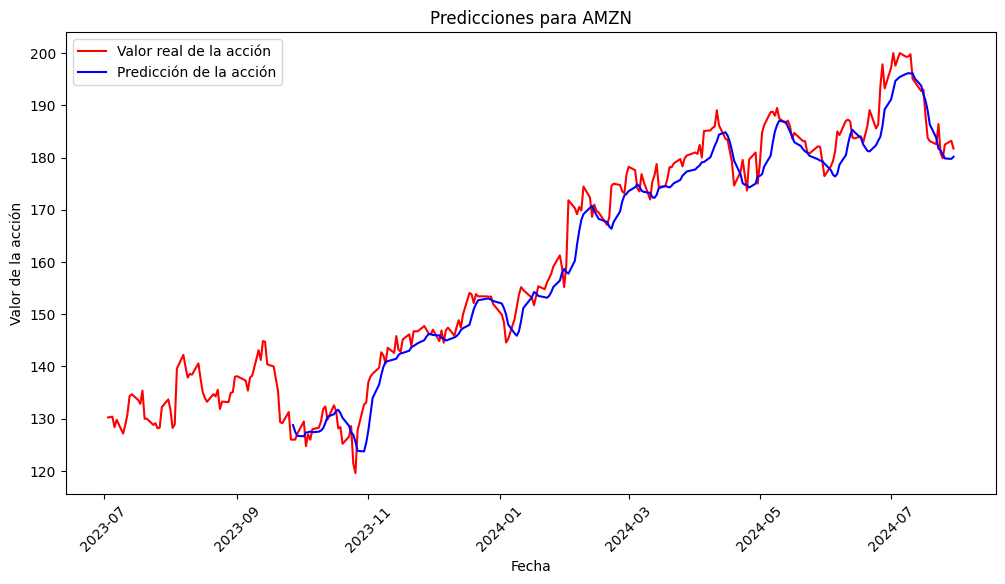

Mean Squared Error (MSE) para AMZN: 14.764645429772429
Mean Absolute Error (MAE) para AMZN: 2.989071662285819
R^2 Score para AMZN: 0.9669296602406747
Procesando GOOGL...
Modelo cargado para GOOGL.


<ipython-input-29-ba7527f363f1>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


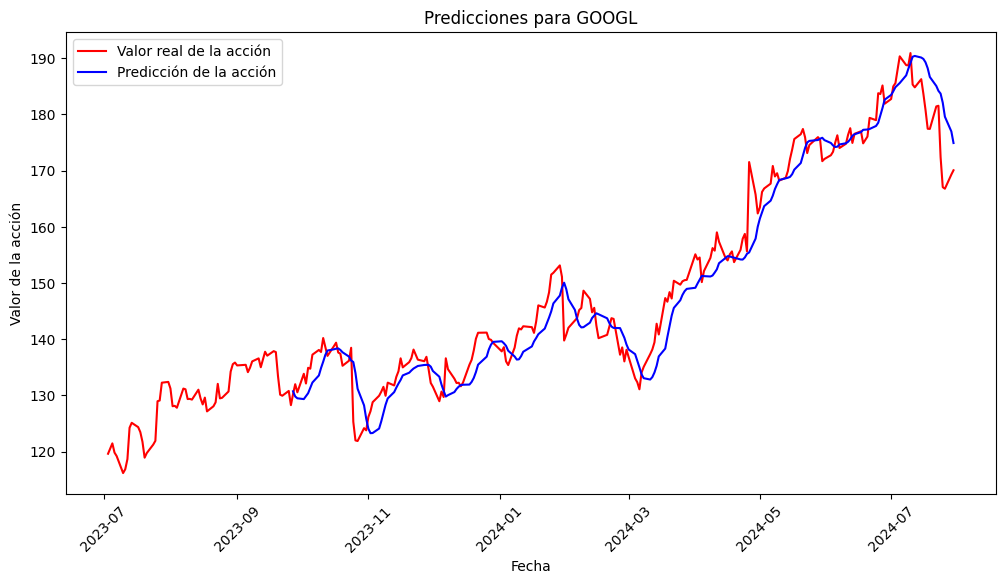

Mean Squared Error (MSE) para GOOGL: 18.694204346098534
Mean Absolute Error (MAE) para GOOGL: 3.352091001764714
R^2 Score para GOOGL: 0.9443343633928728
Procesando NVDA...
Modelo cargado para NVDA.


<ipython-input-29-ba7527f363f1>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


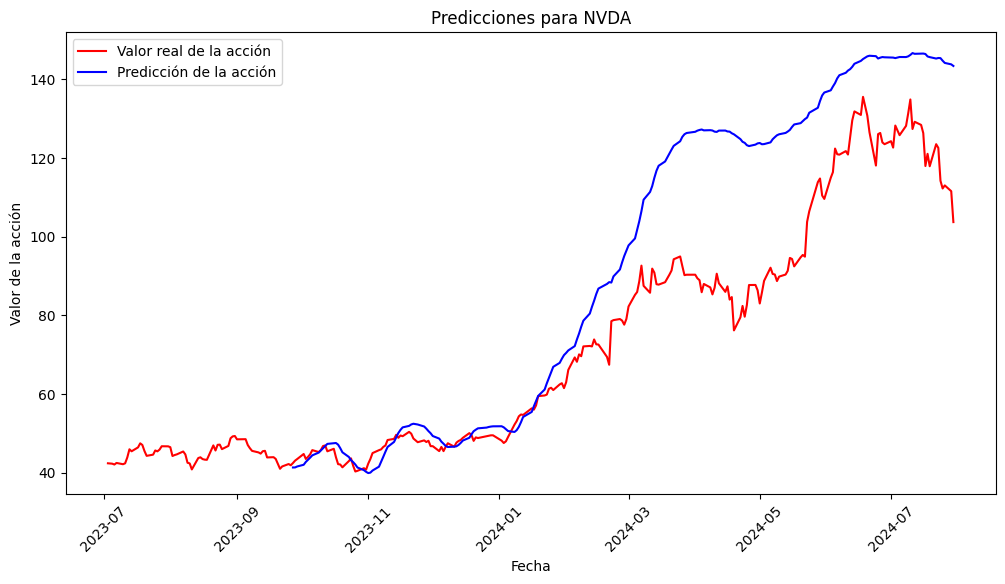

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 42.4 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
42.5 K    Trainable params
0         Non-trainable params
42.5 K    Total params
0.170     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Mean Squared Error (MSE) para NVDA: 455.8092153427854
Mean Absolute Error (MAE) para NVDA: 15.877183219770739
R^2 Score para NVDA: 0.4540668165194369
Procesando AAPL...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Modelo guardado para AAPL.


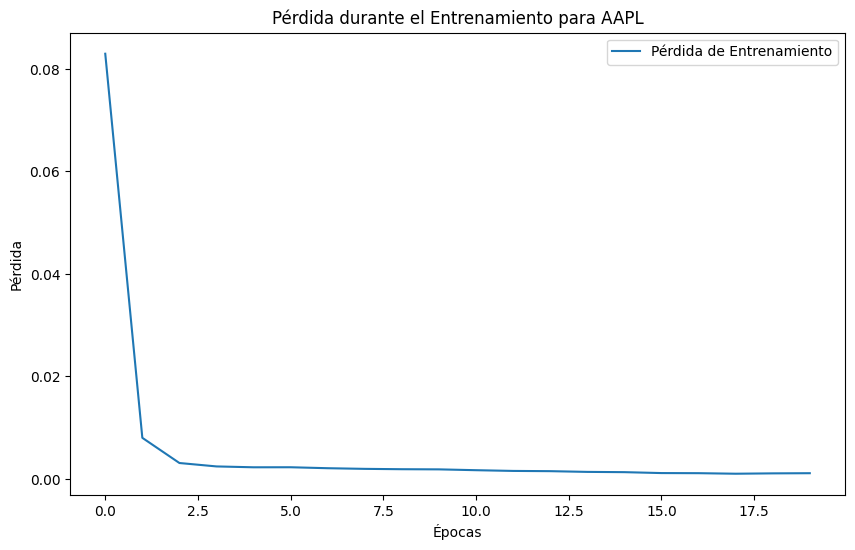

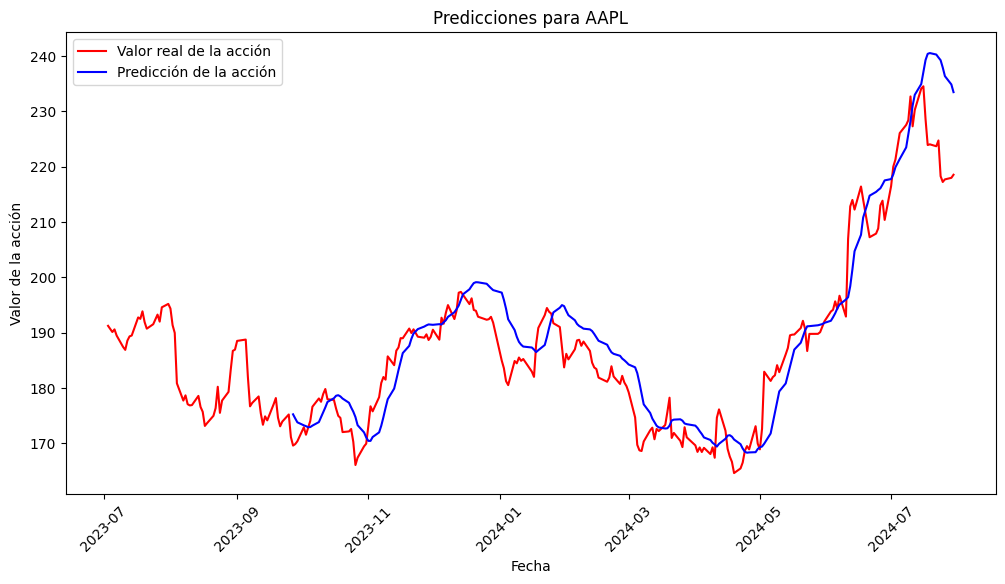

Mean Squared Error (MSE) para AAPL: 38.080679448779215
Mean Absolute Error (MAE) para AAPL: 4.704106356591692
R^2 Score para AAPL: 0.8614810596744618
Procesando NFLX...
Modelo cargado para NFLX.


<ipython-input-29-ba7527f363f1>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


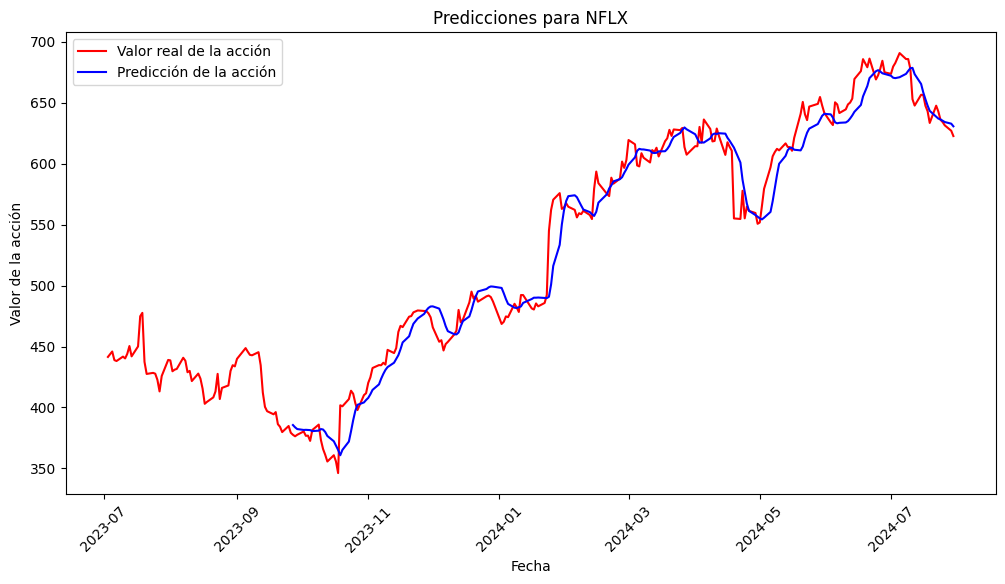

Mean Squared Error (MSE) para NFLX: 267.25139269228305
Mean Absolute Error (MAE) para NFLX: 11.963359756041777
R^2 Score para NFLX: 0.969848522236064
Procesando GME...
Modelo cargado para GME.


<ipython-input-29-ba7527f363f1>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


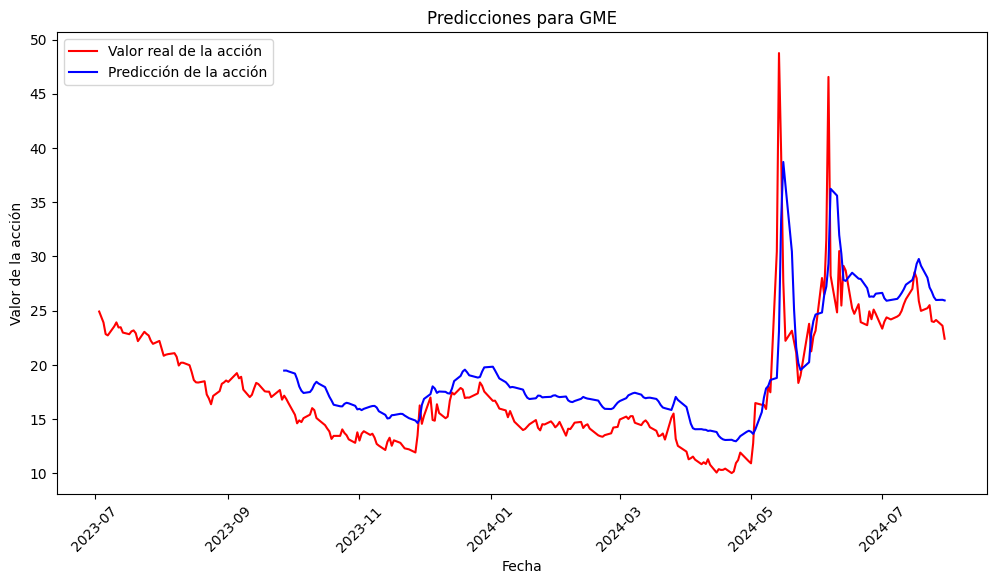

Mean Squared Error (MSE) para GME: 14.36235620944434
Mean Absolute Error (MAE) para GME: 2.841777541789955
R^2 Score para GME: 0.6126222575860638
  ticker         mse        mae        r2  final_loss
0   AMZN   14.764645   2.989072  0.966930         NaN
1  GOOGL   18.694204   3.352091  0.944334         NaN
2   NVDA  455.809215  15.877183  0.454067         NaN
3   AAPL   38.080679   4.704106  0.861481    0.001127
4   NFLX  267.251393  11.963360  0.969849         NaN
5    GME   14.362356   2.841778  0.612622         NaN
           AMZN       GOOGL        NVDA        AAPL        NFLX        GME
0    128.753839  130.719863   41.335366  175.212905  385.592727  19.461733
1    127.459223  129.795071   41.346244  174.469753  383.720299  19.467617
2    126.694707  129.472647   41.593795  173.771128  382.288878  19.389366
3    126.614486  129.331570   42.026043  173.221961  381.550114  19.189371
4    127.342717  129.862370   42.749735  173.072060  381.661849  18.674678
..          ...         ..

In [30]:
# Almacenar resultados
resultados = []
predicciones = {}

# Hacer predicciones para cada ticker y almacenar m√©tricas
for ticker in tickers:
    print(f"Procesando {ticker}...")
    resultado = train_and_predict(ticker)
    resultados.append(resultado)
    predicciones[ticker] = resultado['prediccion']

# Crear DataFrame con resultados
resultados_df = pd.DataFrame(resultados)
resultados_df = resultados_df[['ticker', 'mse', 'mae', 'r2', 'final_loss']]

# Mostrar la tabla de resultados
print(resultados_df)

# Guardar las predicciones futuras en un DataFrame
future_prices_df = pd.DataFrame(predicciones)
print(future_prices_df)


# **MODELO 2. LSTM con informaci√≥n adicional de noticias y an√°lisis de sentimientos**

## **Extracci√≥n de Datos Financieros**

In [9]:
import yfinance as yf

# Descargar datos financieros de AAPL
def download_data(ticker):
    data = yf.download(ticker, start='2020-06-01', end='2024-06-30')
    data['MA_10'] = data['Adj Close'].rolling(window=10).mean()
    data['MA_30'] = data['Adj Close'].rolling(window=30).mean()
    data['MA_60'] = data['Adj Close'].rolling(window=60).mean()
    data.dropna(inplace=True)  # Eliminar filas con valores NaN debido al c√°lculo de medias m√≥viles
    return data

# Descargar datos financieros de AAPL
ticker = 'AAPL'
data = download_data(ticker)
print(data.head())

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-08-24  128.697495  128.785004  123.937500  125.857498  122.993576   
2020-08-25  124.697502  125.180000  123.052498  124.824997  121.984589   
2020-08-26  126.180000  126.992500  125.082497  126.522499  123.643456   
2020-08-27  127.142502  127.485001  123.832497  125.010002  122.165382   
2020-08-28  126.012497  126.442497  124.577499  124.807503  121.967491   

               Volume       MA_10       MA_30      MA_60  
Date                                                      
2020-08-24  345937600  114.013443  103.624973  94.947137  
2020-08-25  211495600  115.523286  104.535184  95.672046  
2020-08-26  163022400  116.843789  105.478988  96.418547  
2020-08-27  155552400  117.821033  106.412622  97.133178  
2020-08-28  187630000  118.788505  107.346001  97.855892  


## **Extracci√≥n de Noticias Financieras**

In [10]:
def obtener_noticias_yfinance(ticker):
    stock = yf.Ticker(ticker)
    noticias = stock.news
    return noticias

# Obtener noticias de AAPL
noticias_yf = obtener_noticias_yfinance(ticker)

# Mostrar un resumen de las primeras noticias obtenidas
for noticia in noticias_yf[:5]:
    print(f"Fecha: {noticia['providerPublishTime']}")
    print(f"Fuente: {noticia['publisher']}")
    print(f"Titulo: {noticia['title']}")
    print(f"Enlace: {noticia['link']}\n")


Fecha: 1726275600
Fuente: The Wall Street Journal
Titulo: Apple Has a Hot New Product. It‚Äôs a Hearing Aid.
Enlace: https://finance.yahoo.com/m/4aa4bc7b-42ce-3c83-95a5-7531f63e04bc/apple-has-a-hot-new-product..html

Fecha: 1726263919
Fuente: Zacks
Titulo: Apple (AAPL) Stock Drops Despite Market Gains: Important Facts to Note
Enlace: https://finance.yahoo.com/news/apple-aapl-stock-drops-despite-214519779.html

Fecha: 1726257850
Fuente: Investor's Business Daily
Titulo: Apple Begins Taking Preorders For AI-Enabled iPhone 16 Handsets
Enlace: https://finance.yahoo.com/m/b92b0d3f-72c2-35ce-ad46-c9a1915b22cf/apple-begins-taking-preorders.html

Fecha: 1726249762
Fuente: MT Newswires
Titulo: Apple Seeks Dismissal of Lawsuit Against Israeli Cyber Intelligence Firm NSO Group
Enlace: https://finance.yahoo.com/news/apple-seeks-dismissal-lawsuit-against-174922373.html

Fecha: 1726248205
Fuente: Investopedia
Titulo: FDA Approves OTC Hearing Aid Software Device for Apple AirPods Pro
Enlace: https://

## **Extracci√≥n de publicaciones de Reddit**

In [11]:
import nest_asyncio
import asyncio
import asyncpraw

nest_asyncio.apply()

async def obtener_reddit_async(ticker, cliente_id, cliente_secret, usuario, contrase√±a, user_agent, subreddit='WallStreetBets', limite=100):
    reddit = asyncpraw.Reddit(client_id=cliente_id,
                              client_secret=cliente_secret,
                              user_agent=user_agent,
                              username=usuario,
                              password=contrase√±a)

    subreddit = await reddit.subreddit(subreddit)
    publicaciones = subreddit.search(ticker, limit=limite)
    datos = []
    async for post in publicaciones:
        datos.append({
            'titulo': post.title,
            'cuerpo': post.selftext,
            'fecha': post.created_utc
        })
    return datos

# Ejecutar la funci√≥n as√≠ncrona
cliente_id = "H3cf4dEtELCFz7w3z6eIKw"
cliente_secret = "lxNt3eDn3Y1XA57EIq3_Q92AQ_Ntyw"
usuario = "RoutineStrain7301"
contrase√±a = "Tavinr1717*"
user_agent = "proyectogustav"

# Ejecutar la funci√≥n para obtener los posts de Reddit de AAPL
reddit_posts = asyncio.run(obtener_reddit_async(ticker, cliente_id, cliente_secret, usuario, contrase√±a, user_agent))

# Mostrar un resumen de los primeros posts obtenidos
for post in reddit_posts[:5]:
    print(f"Fecha: {post['fecha']}")
    print(f"T√≠tulo: {post['titulo']}")
    print(f"Cuerpo: {post['cuerpo']}\n")


Fecha: 1724950083.0
T√≠tulo: AAPL; please stay up this time to keep over 7 figures
Cuerpo: 

Fecha: 1722691855.0
T√≠tulo: My theory why buffet sold aapl
Cuerpo: Everyone is freaking out about recession and also citing buffet selling half his stake in aapl as proof. But the reality is buffet doesn't time the market he holds good companies through recessions. But if you look at a lot of his other moves, sold all his TSM and a large portion of BYD as well. Its clear that buffet has geopolitical risks on the top of his mind, aapl would be obliterated in the case of a taiwan war. 

Afterall, why wouldn't he sell his American express position in a material way, wouldn't they get hit hard in a recession as well with delinquencies and decreased consumer spending? 

I guess this post doesn't really offer much reassurance as a taiwan war would be worse than a recession. But honestly I think you should trade like it wouldn't happen because if it does it would probably devolve into nuclear war and

## **Analisis de sentimientos con VADER**

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import datetime

# Inicializar VADER
analyzer = SentimentIntensityAnalyzer()

# Funci√≥n para analizar el sentimiento usando VADER
def analizar_sentimiento_vader(texto):
    scores = analyzer.polarity_scores(texto)
    return scores['compound']

# Convertir timestamps a fechas legibles
def convertir_fecha(timestamp):
    if isinstance(timestamp, (int, float)):  # Si es un n√∫mero, convi√©rtelo
        return datetime.datetime.fromtimestamp(timestamp)
    elif isinstance(timestamp, datetime.datetime):  # Si ya es un objeto datetime, devu√©lvelo tal cual
        return timestamp
    else:
        raise ValueError(f"Tipo de timestamp inesperado: {type(timestamp)}")

# Limpiar texto y analizar sentimiento
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def limpiar_texto(texto):
    # Mantener s√≠mbolos financieros como % y +/-
    texto = re.sub(r'[^a-zA-Z0-9%+-]', ' ', texto)
    texto = texto.lower()
    tokens = texto.split()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Procesar noticias de yfinance
def procesar_noticias_yf(noticias_yf):
    for noticia in noticias_yf:
        fecha = convertir_fecha(noticia['providerPublishTime'])
        noticia['fecha'] = fecha
        descripcion = noticia.get('description', '')
        texto_completo = noticia['title'] + " " + descripcion
        noticia['sentimiento'] = analizar_sentimiento_vader(limpiar_texto(texto_completo))
    return noticias_yf

# Procesar posts de Reddit
def procesar_reddit_posts(reddit_posts):
    for post in reddit_posts:
        fecha = convertir_fecha(post['fecha'])
        post['fecha'] = fecha
        post['sentimiento'] = analizar_sentimiento_vader(limpiar_texto(post['titulo'] + " " + post['cuerpo']))
    return reddit_posts

# Procesar los datos obtenidos
noticias_yf_procesadas = procesar_noticias_yf(noticias_yf)
reddit_posts_procesados = procesar_reddit_posts(reddit_posts)

# Mostrar un resumen
for noticia in noticias_yf_procesadas[:3]:
    print(f"Fecha: {noticia['fecha']}, Sentimiento: {noticia['sentimiento']}, Titulo: {noticia['title']}")

for post in reddit_posts_procesados[:3]:
    print(f"Fecha: {post['fecha']}, Sentimiento: {post['sentimiento']}, T√≠tulo: {post['titulo']}")


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7c0c26c84a30>
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Fecha: 2024-09-14 01:00:00, Sentimiento: 0.0, Titulo: Apple Has a Hot New Product. It‚Äôs a Hearing Aid.
Fecha: 2024-09-13 21:45:19, Sentimiento: -0.6671, Titulo: Apple (AAPL) Stock Drops Despite Market Gains: Important Facts to Note
Fecha: 2024-09-13 20:04:10, Sentimiento: 0.0, Titulo: Apple Begins Taking Preorders For AI-Enabled iPhone 16 Handsets
Fecha: 2024-08-29 16:48:03, Sentimiento: 0.3182, T√≠tulo: AAPL; please stay up this time to keep over 7 figures
Fecha: 2024-08-03 13:30:55, Sentimiento: -0.9488, T√≠tulo: My theory why buffet sold aapl
Fecha: 2024-07-30 14:01:57, Sentimiento: 0.8625, T√≠tulo: aapl earnings YOLO


## **Sincronizaci√≥n de los sentimientos con los datos financieros**

In [13]:
# Crear DataFrames de noticias y Reddit
noticias_df = pd.DataFrame(noticias_yf_procesadas)
noticias_df['fecha'] = noticias_df['fecha'].dt.date

reddit_df = pd.DataFrame(reddit_posts_procesados)
reddit_df['fecha'] = reddit_df['fecha'].dt.date

# Sentimientos promedios diarios
sentimiento_noticias_diario = noticias_df.groupby('fecha')['sentimiento'].mean()
sentimiento_reddit_diario = reddit_df.groupby('fecha')['sentimiento'].mean()

# A√±adir a los datos financieros de AAPL
data['sentimiento_noticias'] = data.index.map(sentimiento_noticias_diario)
data['sentimiento_reddit'] = data.index.map(sentimiento_reddit_diario)

# Rellenar NaN
data['sentimiento_noticias'].fillna(0, inplace=True)
data['sentimiento_reddit'].fillna(0, inplace=True)

# Ver los datos actualizados
print(data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-08-24  128.697495  128.785004  123.937500  125.857498  122.993576   
2020-08-25  124.697502  125.180000  123.052498  124.824997  121.984589   
2020-08-26  126.180000  126.992500  125.082497  126.522499  123.643456   
2020-08-27  127.142502  127.485001  123.832497  125.010002  122.165382   
2020-08-28  126.012497  126.442497  124.577499  124.807503  121.967491   

               Volume       MA_10       MA_30      MA_60  \
Date                                                       
2020-08-24  345937600  114.013443  103.624973  94.947137   
2020-08-25  211495600  115.523286  104.535184  95.672046   
2020-08-26  163022400  116.843789  105.478988  96.418547   
2020-08-27  155552400  117.821033  106.412622  97.133178   
2020-08-28  187630000  118.788505  107.346001  97.855892   

            sentimiento_noticias  sentimiento_reddit  
Date 

In [14]:
# Guardar los resultados en un archivo CSV
data.to_csv('datos_financieros_con_sentimientos_AAPL.csv', index=True)


## **Ajuste del modelo LSTM para usar los sentimientos**

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


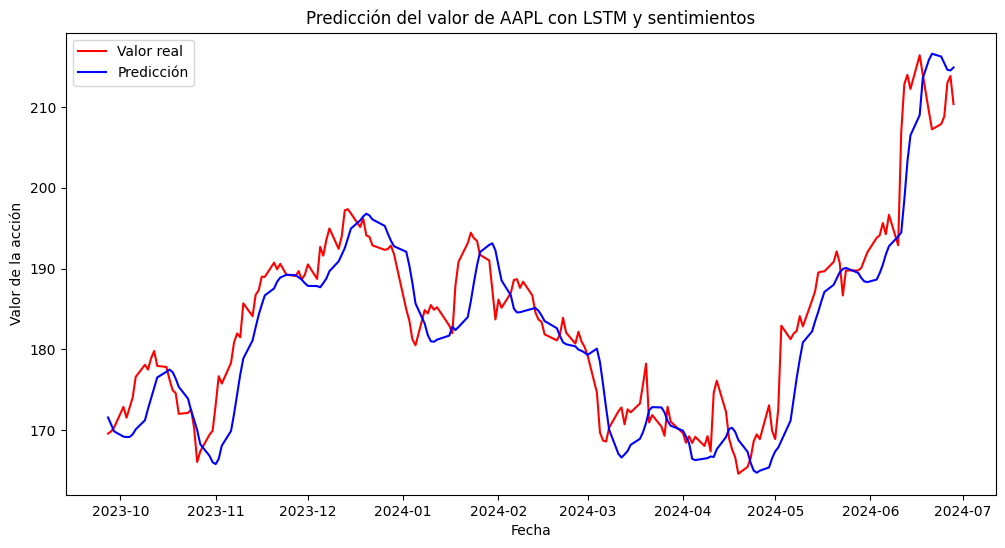

In [15]:
#Ajuste del modelo LSTM para usar los sentimientos
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Configuraci√≥n del modelo LSTM
class LSTMModel(pl.LightningModule):
    def __init__(self, input_size=6, hidden_layer_size=100, output_size=1, lr=0.001):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.lr = lr
        self.criterion = nn.MSELoss()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

# Preprocesamiento de los datos para entrenar el modelo LSTM

# Usamos las columnas de 'Adj Close', medias m√≥viles y los sentimientos
caracteristicas = ['Adj Close', 'MA_10', 'MA_30', 'MA_60', 'sentimiento_noticias', 'sentimiento_reddit']
set_entrenamiento = data.loc[:'2023-06-30', caracteristicas]
set_validacion = data.loc['2023-07-01':, caracteristicas]

# Escalado de los datos
sc = MinMaxScaler(feature_range=(0, 1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)
set_validacion_escalado = sc.transform(set_validacion)

# Preparaci√≥n de datos para PyTorch
time_step = 60
X_train, Y_train = [], []
m = len(set_entrenamiento_escalado)

for i in range(time_step, m):
    X_train.append(set_entrenamiento_escalado[i-time_step:i])
    Y_train.append(set_entrenamiento_escalado[i, 0])  # Columna 'Adj Close'

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Entrenamiento del modelo LSTM
model = LSTMModel(input_size=len(caracteristicas))  # El tama√±o de entrada ahora es 6
trainer = pl.Trainer(max_epochs=20, logger=False)
trainer.fit(model, train_loader)

# Preparar datos de validaci√≥n para la predicci√≥n
X_test = []
for i in range(time_step, len(set_validacion_escalado)):
    X_test.append(set_validacion_escalado[i-time_step:i])

X_test = np.array(X_test)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Predicci√≥n
model.eval()
with torch.no_grad():
    prediccion = model(X_test).numpy()

# Desescalar la predicci√≥n
prediccion = sc.inverse_transform(np.concatenate([prediccion, np.zeros((prediccion.shape[0], len(caracteristicas)-1))], axis=1))[:, 0]

# Graficar las predicciones
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(set_validacion.index[time_step:], set_validacion['Adj Close'][time_step:], color='red', label='Valor real')
plt.plot(set_validacion.index[time_step:], prediccion, color='blue', label='Predicci√≥n')
plt.xlabel('Fecha')
plt.ylabel('Valor de la acci√≥n')
plt.title('Predicci√≥n del valor de AAPL con LSTM y sentimientos')
plt.legend()
plt.show()



### **gr√°fico del sentimiento en el tiempo**

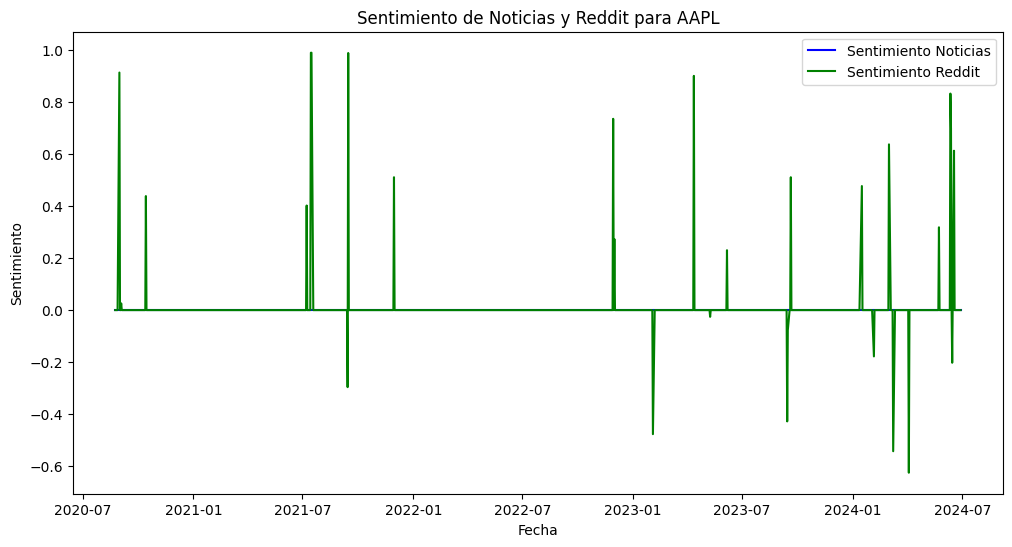

In [16]:
import matplotlib.pyplot as plt

# Graficar sentimiento de noticias y Reddit
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['sentimiento_noticias'], label='Sentimiento Noticias', color='blue')
plt.plot(data.index, data['sentimiento_reddit'], label='Sentimiento Reddit', color='green')
plt.xlabel('Fecha')
plt.ylabel('Sentimiento')
plt.title('Sentimiento de Noticias y Reddit para AAPL')
plt.legend()
plt.show()


In [17]:
# D√≠as con el sentimiento m√°s alto en noticias
print("D√≠as con mayor sentimiento en noticias:")
print(data[['sentimiento_noticias']].sort_values(by='sentimiento_noticias', ascending=False).head())

# D√≠as con el sentimiento m√°s bajo en noticias
print("D√≠as con menor sentimiento en noticias:")
print(data[['sentimiento_noticias']].sort_values(by='sentimiento_noticias').head())

# D√≠as con el sentimiento m√°s alto en Reddit
print("D√≠as con mayor sentimiento en Reddit:")
print(data[['sentimiento_reddit']].sort_values(by='sentimiento_reddit', ascending=False).head())

# D√≠as con el sentimiento m√°s bajo en Reddit
print("D√≠as con menor sentimiento en Reddit:")
print(data[['sentimiento_reddit']].sort_values(by='sentimiento_reddit').head())


D√≠as con mayor sentimiento en noticias:
            sentimiento_noticias
Date                            
2020-08-24                   0.0
2023-04-17                   0.0
2023-03-07                   0.0
2023-03-08                   0.0
2023-03-09                   0.0
D√≠as con menor sentimiento en noticias:
            sentimiento_noticias
Date                            
2020-08-24                   0.0
2023-03-07                   0.0
2023-03-08                   0.0
2023-03-09                   0.0
2023-03-10                   0.0
D√≠as con mayor sentimiento en Reddit:
            sentimiento_reddit
Date                          
2021-07-15              0.9891
2021-07-16              0.9891
2021-09-15              0.9880
2020-08-31              0.9129
2023-04-12              0.9001
D√≠as con menor sentimiento en Reddit:
            sentimiento_reddit
Date                          
2024-04-03            -0.62490
2024-03-08            -0.54230
2023-02-03            -0.47670
2023-0

## **Modelo 2.2. LSTM para varias acciones**

In [31]:
import yfinance as yf

# Descargar datos financieros de m√∫ltiples tickers
def download_data_multiple(tickers):
    datos_acciones = {}
    for ticker in tickers:
        data = yf.download(ticker, start='2020-06-01', end='2024-06-30')
        data['MA_10'] = data['Adj Close'].rolling(window=10).mean()
        data['MA_30'] = data['Adj Close'].rolling(window=30).mean()
        data['MA_60'] = data['Adj Close'].rolling(window=60).mean()
        data.dropna(inplace=True)
        datos_acciones[ticker] = data
    return datos_acciones

# Lista de tickers
tickers = ['AMZN', 'GOOGL', 'NVDA', 'MSFT', 'AAPL','GME']

# Descargar datos de todas las acciones
datos_acciones = download_data_multiple(tickers)
print(f"Datos descargados para {len(datos_acciones)} acciones.")

# Descargar noticias de yfinance
def obtener_noticias_yfinance(ticker):
    stock = yf.Ticker(ticker)
    noticias = stock.news
    return noticias

# Descargar noticias para m√∫ltiples tickers
def obtener_noticias_multiple(tickers):
    noticias_acciones = {}
    for ticker in tickers:
        noticias_acciones[ticker] = obtener_noticias_yfinance(ticker)
    return noticias_acciones

# Obtener noticias para todas las acciones
noticias_yf_multiple = obtener_noticias_multiple(tickers)

# Implementar la funci√≥n corregida para obtener posts de Reddit
import nest_asyncio
import asyncio
import asyncpraw

nest_asyncio.apply()

# Funci√≥n as√≠ncrona para obtener posts de Reddit para un ticker
async def obtener_reddit_async(ticker, cliente_id, cliente_secret, usuario, contrase√±a, user_agent, subreddit='WallStreetBets', limite=100):
    async with asyncpraw.Reddit(client_id=cliente_id,
                                client_secret=cliente_secret,
                                user_agent=user_agent,
                                username=usuario,
                                password=contrase√±a) as reddit:

        subreddit = await reddit.subreddit(subreddit)
        publicaciones = subreddit.search(ticker, limit=limite)
        datos = []
        async for post in publicaciones:
            datos.append({
                'titulo': post.title,
                'cuerpo': post.selftext,
                'fecha': post.created_utc
            })
    return datos

# Obtener posts de Reddit para m√∫ltiples tickers
def obtener_reddit_multiple(tickers, cliente_id, cliente_secret, usuario, contrase√±a, user_agent):
    reddit_posts_acciones = {}
    for ticker in tickers:
        reddit_posts_acciones[ticker] = asyncio.run(obtener_reddit_async(ticker, cliente_id, cliente_secret, usuario, contrase√±a, user_agent))
    return reddit_posts_acciones

# Informaci√≥n de autenticaci√≥n de Reddit
cliente_id = "H3cf4dEtELCFz7w3z6eIKw"
cliente_secret = "lxNt3eDn3Y1XA57EIq3_Q92AQ_Ntyw"
usuario = "RoutineStrain7301"
contrase√±a = "Tavinr1717*"
user_agent = "proyectogustav"

# Obtener posts de Reddit para todas las acciones
reddit_posts_multiple = obtener_reddit_multiple(tickers, cliente_id, cliente_secret, usuario, contrase√±a, user_agent)

# Mostrar un resumen de las primeras noticias y posts obtenidos
for ticker in tickers:
    print(f"Noticias de {ticker}:")
    for noticia in noticias_yf_multiple[ticker][:3]:
        print(f"Fecha: {noticia['providerPublishTime']}")
        print(f"Fuente: {noticia['publisher']}")
        print(f"Titulo: {noticia['title']}")
        print(f"Enlace: {noticia['link']}\n")

    print(f"Posts de Reddit sobre {ticker}:")
    for post in reddit_posts_multiple[ticker][:3]:
        print(f"Fecha: {post['fecha']}")
        print(f"T√≠tulo: {post['titulo']}")
        print(f"Cuerpo: {post['cuerpo']}\n")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Datos descargados para 6 acciones.
Noticias de AMZN:
Fecha: 1726261019
Fuente: Financial Times
Titulo: US targets trade loophole used by ecommerce groups Temu and Shein
Enlace: https://finance.yahoo.com/news/us-targets-trade-loophole-used-150106856.html

Fecha: 1726249585
Fuente: Insider Monkey
Titulo: Amazon.com, Inc. (AMZN): A Bull Case Theory
Enlace: https://finance.yahoo.com/news/amazon-com-inc-amzn-bull-174625590.html

Fecha: 1726242128
Fuente: Yahoo Finance Video
Titulo: Oracle is 'advantaged.' Analyst explains why.
Enlace: https://finance.yahoo.com/video/oracle-advantaged-analyst-explains-why-154208164.html

Posts de Reddit sobre AMZN:
Fecha: 1719173674.0
T√≠tulo: AMZN to go above
Cuerpo: I think this year Amazon stock/calls price is pretty undervalued atm.

My guess is they will crush any labor unions and have strong revenue growth this year.

My play is buying $230 calls exp 10/15 trading at $1.73 when market opens tomorrow 

What are everyone‚Äôs thoughts?

Fecha: 1723906617.

## **Procesar noticias y sentimientos para m√∫ltiples acciones**

In [32]:
# Procesar noticias y posts de Reddit para m√∫ltiples acciones
def procesar_datos_sentimientos_multiple(noticias_yf_multiple, reddit_posts_multiple):
    sentimientos_acciones = {}
    for ticker in tickers:
        noticias_procesadas = procesar_noticias_yf(noticias_yf_multiple[ticker])
        reddit_procesados = procesar_reddit_posts(reddit_posts_multiple[ticker])

        # Crear DataFrames y calcular sentimiento promedio diario
        noticias_df = pd.DataFrame(noticias_procesadas)
        noticias_df['fecha'] = noticias_df['fecha'].dt.date
        sentimiento_noticias_diario = noticias_df.groupby('fecha')['sentimiento'].mean()

        reddit_df = pd.DataFrame(reddit_procesados)
        reddit_df['fecha'] = reddit_df['fecha'].dt.date
        sentimiento_reddit_diario = reddit_df.groupby('fecha')['sentimiento'].mean()

        sentimientos_acciones[ticker] = {'noticias': sentimiento_noticias_diario, 'reddit': sentimiento_reddit_diario}

    return sentimientos_acciones

# Procesar los sentimientos para todas las acciones
sentimientos_acciones = procesar_datos_sentimientos_multiple(noticias_yf_multiple, reddit_posts_multiple)


## **Integrar sentimientos con los datos financieros**

In [33]:
# A√±adir los sentimientos a los datos financieros
for ticker in tickers:
    data = datos_acciones[ticker]
    data['sentimiento_noticias'] = data.index.map(sentimientos_acciones[ticker]['noticias'])
    data['sentimiento_reddit'] = data.index.map(sentimientos_acciones[ticker]['reddit'])
    data['sentimiento_noticias'].fillna(0, inplace=True)
    data['sentimiento_reddit'].fillna(0, inplace=True)
    datos_acciones[ticker] = data


### **Entrenamiento del modelo para varias acciones**

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para AMZN...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


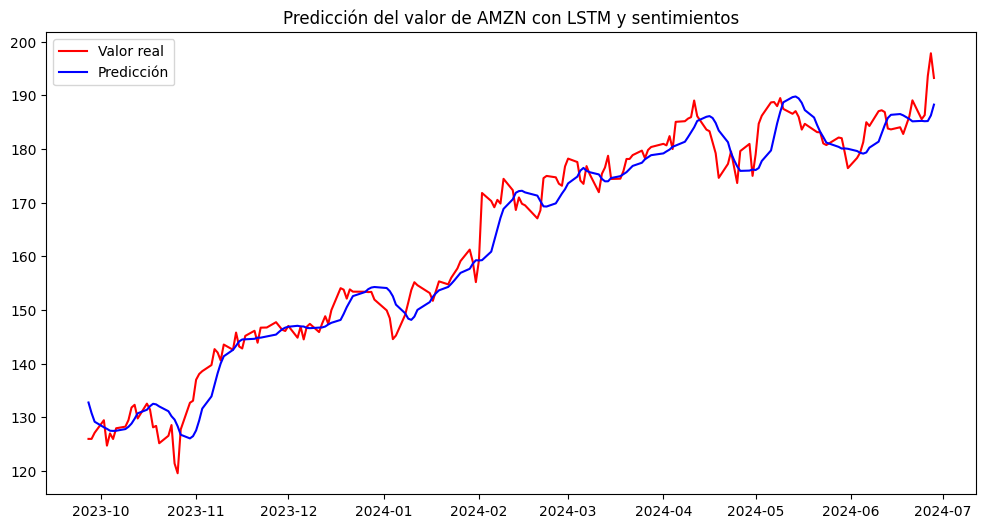

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para GOOGL...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


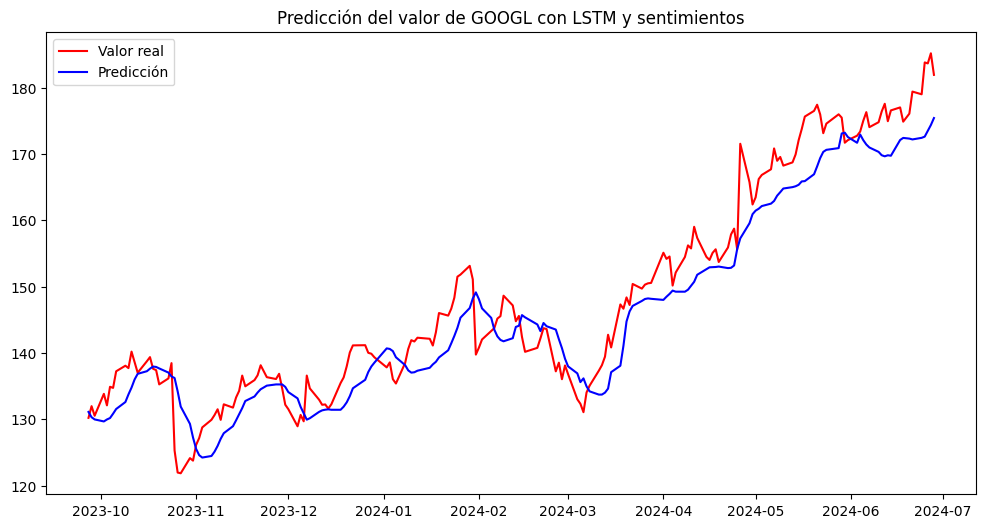

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para NVDA...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


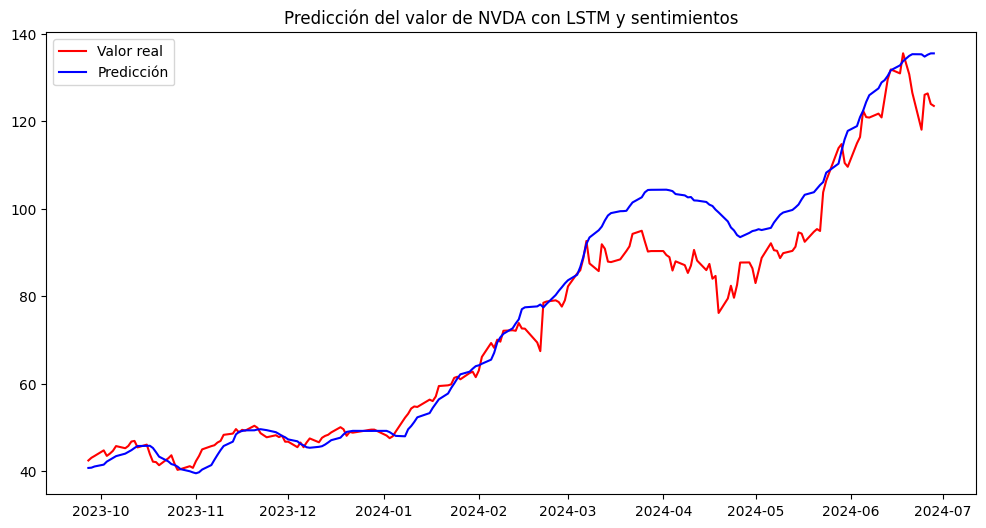

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para MSFT...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


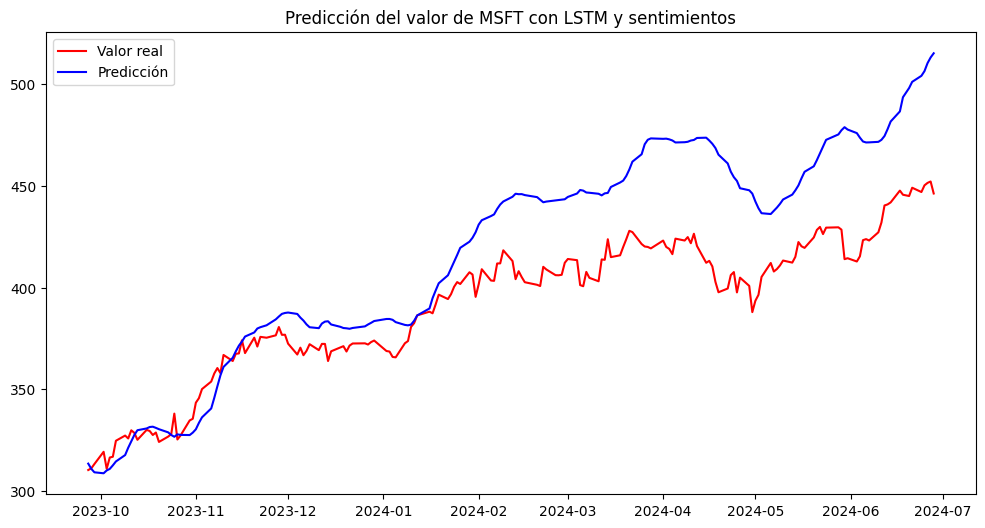

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para AAPL...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


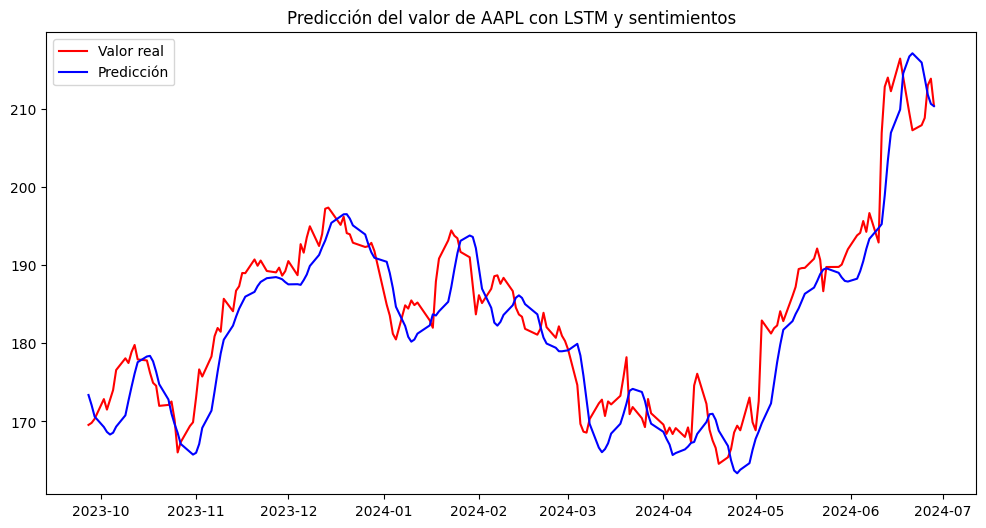

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para GME...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


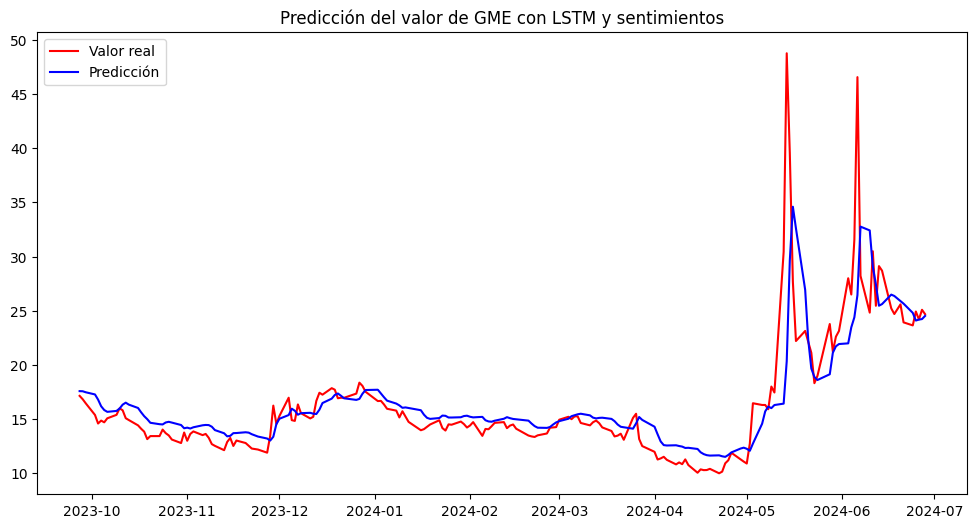

In [34]:
for ticker in tickers:
    print(f"Entrenando modelo para {ticker}...")
    data = datos_acciones[ticker]
    caracteristicas = ['Adj Close', 'MA_10', 'MA_30', 'MA_60', 'sentimiento_noticias', 'sentimiento_reddit']

    # Preprocesar datos de entrenamiento y validaci√≥n
    set_entrenamiento = data.loc[:'2023-06-30', caracteristicas]
    set_validacion = data.loc['2023-07-01':, caracteristicas]

    # Escalado de los datos
    sc = MinMaxScaler(feature_range=(0, 1))
    set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)
    set_validacion_escalado = sc.transform(set_validacion)

    # Preparaci√≥n de los datos para el modelo
    X_train, Y_train = [], []
    m = len(set_entrenamiento_escalado)
    for i in range(time_step, m):
        X_train.append(set_entrenamiento_escalado[i-time_step:i])
        Y_train.append(set_entrenamiento_escalado[i, 0])

    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)

    # Crear DataLoader
    train_dataset = TensorDataset(X_train, Y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Crear y entrenar el modelo
    model = LSTMModel(input_size=len(caracteristicas))
    trainer = pl.Trainer(max_epochs=20, logger=False)
    trainer.fit(model, train_loader)

    # Hacer predicciones
    X_test = []
    for i in range(time_step, len(set_validacion_escalado)):
        X_test.append(set_validacion_escalado[i-time_step:i])

    X_test = np.array(X_test)
    X_test = torch.tensor(X_test, dtype=torch.float32)

    # Predicci√≥n
    model.eval()
    with torch.no_grad():
        prediccion = model(X_test).numpy()

    # Desescalar la predicci√≥n
    prediccion = sc.inverse_transform(np.concatenate([prediccion, np.zeros((prediccion.shape[0], len(caracteristicas)-1))], axis=1))[:, 0]

    # Graficar las predicciones
    plt.figure(figsize=(12, 6))
    plt.plot(set_validacion.index[time_step:], set_validacion['Adj Close'][time_step:], color='red', label='Valor real')
    plt.plot(set_validacion.index[time_step:], prediccion, color='blue', label='Predicci√≥n')
    plt.title(f"Predicci√≥n del valor de {ticker} con LSTM y sentimientos")
    plt.legend()
    plt.show()


## **Portafolio**

Rendimientos esperados diarios:
AMZN     0.001626
GOOGL    0.001410
NVDA     0.006003
AAPL     0.001383
NFLX     0.002380
GME      0.002557
dtype: float64

Matriz de covarianza diaria:
           AMZN     GOOGL      NVDA      AAPL      NFLX       GME
AMZN   0.000051  0.000013  0.000031  0.000007  0.000015  0.000006
GOOGL  0.000013  0.000045  0.000028  0.000018  0.000008 -0.000011
NVDA   0.000031  0.000028  0.000125  0.000008  0.000020  0.000010
AAPL   0.000007  0.000018  0.000008  0.000030  0.000011  0.000040
NFLX   0.000015  0.000008  0.000020  0.000011  0.000072  0.000027
GME    0.000006 -0.000011  0.000010  0.000040  0.000027  0.002638
Pesos √≥ptimos del portafolio (Top 5):
AMZN: 0.0500
GOOGL: 0.0500
NVDA: 0.3300
AAPL: 0.0500
NFLX: 0.1900
GME: 0.3300

Retorno esperado del portafolio: 0.0035
Volatilidad del portafolio: 0.0178
Ratio de Sharpe del portafolio: -0.0845


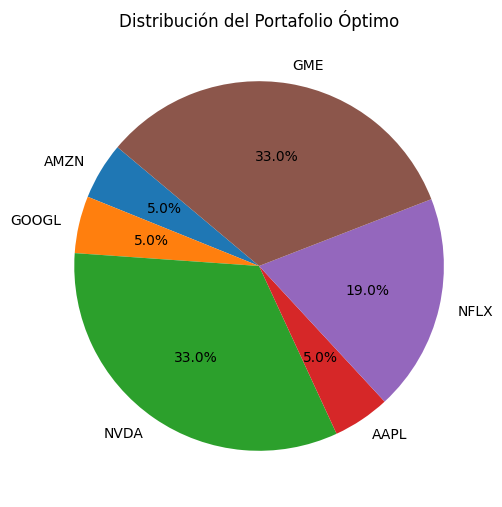

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Supongamos que 'future_prices_df' es un DataFrame con las predicciones de precios de las 5 acciones (AMZN, GOOGL, NVDA, MSFT, NFLX)
# C√°lculo de rendimientos diarios esperados y matriz de covarianza
expected_returns_daily = future_prices_df.pct_change().mean()
cov_matrix_daily = future_prices_df.pct_change().cov()

# Excluir acciones con rendimientos esperados negativos
positive_return_tickers = expected_returns_daily[expected_returns_daily > 0].index
expected_returns_daily = expected_returns_daily[positive_return_tickers]
cov_matrix_daily = cov_matrix_daily.loc[positive_return_tickers, positive_return_tickers]

# Como estamos trabajando con 5 acciones, seleccionamos todas ellas
top_tickers = positive_return_tickers
expected_returns_daily_top = expected_returns_daily[top_tickers]
cov_matrix_daily_top = cov_matrix_daily.loc[top_tickers, top_tickers]

# Mostrar los rendimientos esperados diarios y matriz de covarianza
print("Rendimientos esperados diarios:")
print(expected_returns_daily_top)
print("\nMatriz de covarianza diaria:")
print(cov_matrix_daily_top)

# Funci√≥n para calcular el rendimiento y la volatilidad del portafolio
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std

# Funci√≥n objetivo para la optimizaci√≥n (maximizaci√≥n del Sharpe ratio)
def negative_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.01):
    p_returns, p_std = portfolio_performance(weights, expected_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_std

# Restricciones y l√≠mites para la optimizaci√≥n
num_assets = len(expected_returns_daily_top)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # La suma de los pesos debe ser 1
bounds = tuple((0.05, 0.33) for _ in range(num_assets))  # Limitar el peso de cada acci√≥n entre 5% y 33%

# Inicializar pesos aleatorios
initial_weights = num_assets * [1. / num_assets]

# Optimizaci√≥n para maximizar el Sharpe ratio
opt_results = minimize(negative_sharpe_ratio, initial_weights, args=(expected_returns_daily_top, cov_matrix_daily_top),
                       method='SLSQP', bounds=bounds, constraints=constraints)

# Pesos √≥ptimos del portafolio
optimal_weights = opt_results.x

# Mostrar los pesos √≥ptimos para cada acci√≥n
print("Pesos √≥ptimos del portafolio (Top 5):")
for ticker, weight in zip(top_tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

# Evaluar el rendimiento y la volatilidad del portafolio optimizado
p_returns, p_std = portfolio_performance(optimal_weights, expected_returns_daily_top, cov_matrix_daily_top)
sharpe_ratio = (p_returns - 0.005) / p_std  # Suponiendo una tasa libre de riesgo del 0.5%

print(f"\nRetorno esperado del portafolio: {p_returns:.4f}")
print(f"Volatilidad del portafolio: {p_std:.4f}")
print(f"Ratio de Sharpe del portafolio: {sharpe_ratio:.4f}")

# Visualizaci√≥n de la distribuci√≥n del portafolio optimizado
plt.figure(figsize=(10, 6))
plt.pie(optimal_weights, labels=top_tickers, autopct='%1.1f%%', startangle=140)
plt.title('Distribuci√≥n del Portafolio √ìptimo')
plt.show()


## **MODELO 2.3 Modelo 2.2 Incluyendo metricas**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linea

Datos descargados para 6 acciones.
Entrenando modelo para AMZN...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


M√©tricas para AMZN:
Mean Squared Error (MSE): 17.555198681950355
Mean Absolute Error (MAE): 3.266127782765857
R¬≤ Score: 0.9576367043302643


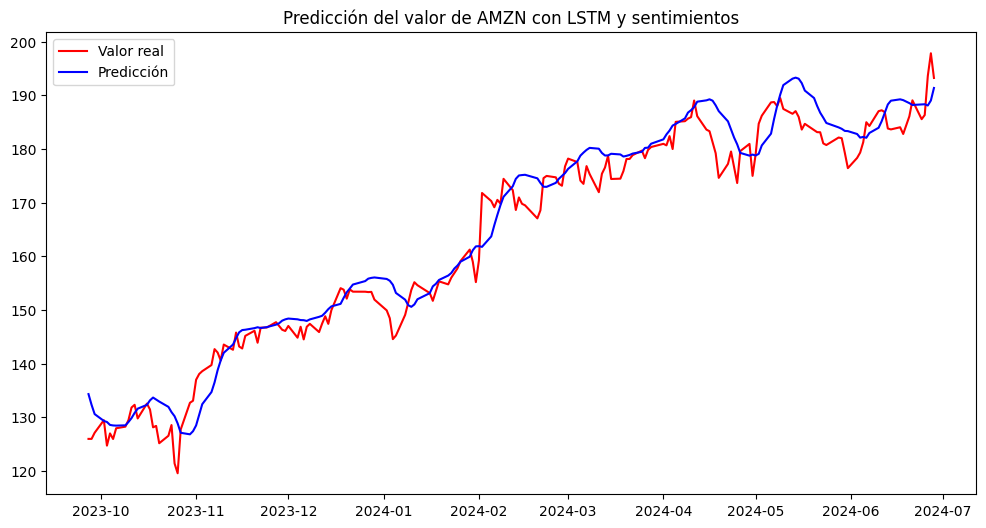

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para GOOGL...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


M√©tricas para GOOGL:
Mean Squared Error (MSE): 20.3919828858807
Mean Absolute Error (MAE): 3.643473573283378
R¬≤ Score: 0.9217032072476661


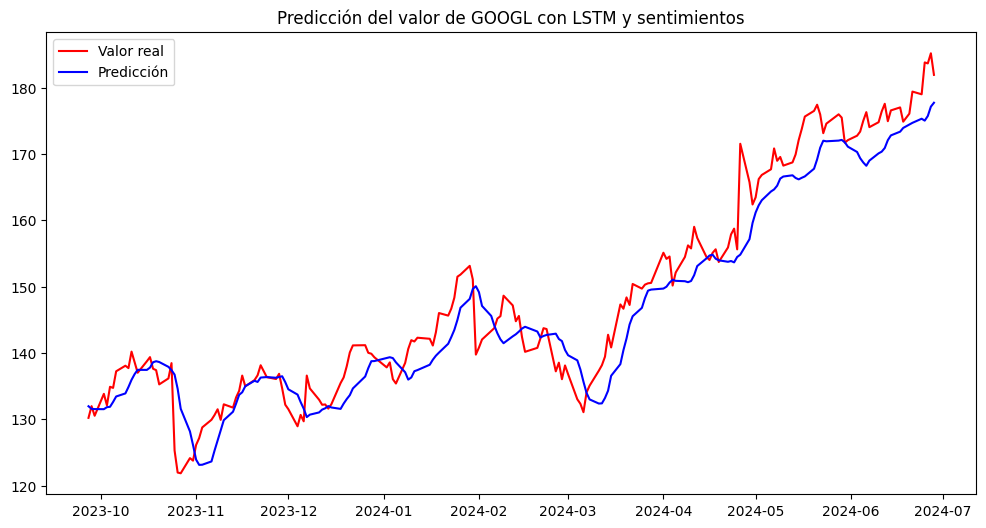

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para NVDA...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


M√©tricas para NVDA:
Mean Squared Error (MSE): 26.863169629109123
Mean Absolute Error (MAE): 4.03554708246697
R¬≤ Score: 0.9604282955588616


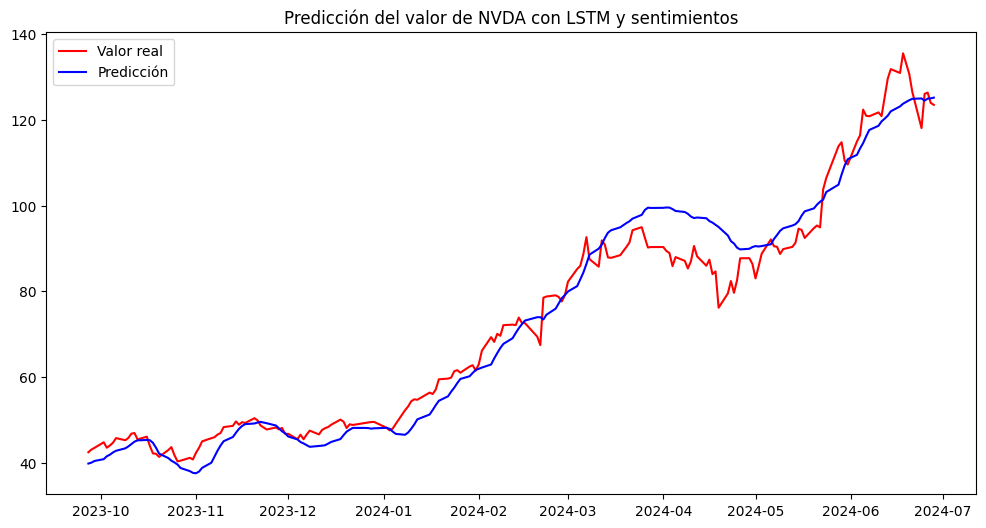

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para AAPL...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


M√©tricas para AAPL:
Mean Squared Error (MSE): 23.504848944125527
Mean Absolute Error (MAE): 3.7736314245114118
R¬≤ Score: 0.8263895016929618


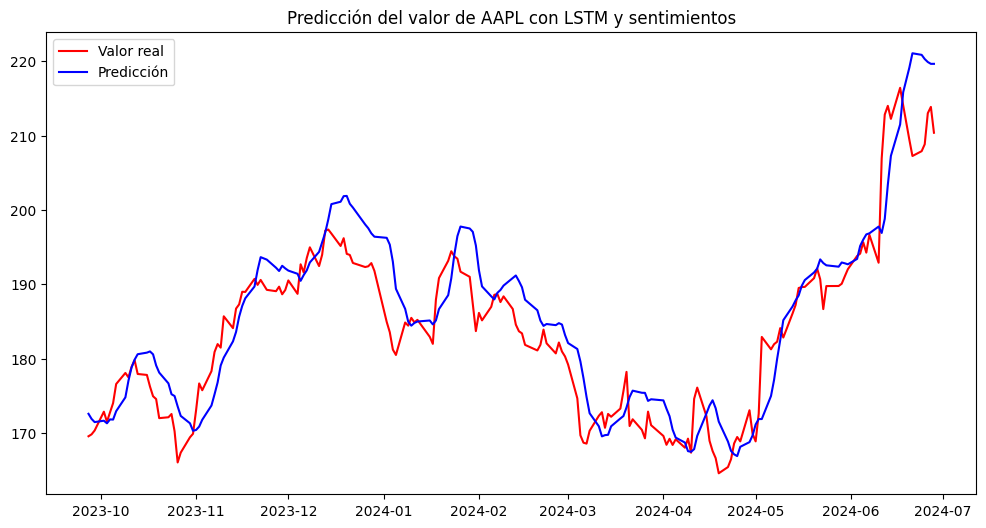

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para NFLX...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


M√©tricas para NFLX:
Mean Squared Error (MSE): 340.9658712258516
Mean Absolute Error (MAE): 14.067983823147713
R¬≤ Score: 0.9596535489955705


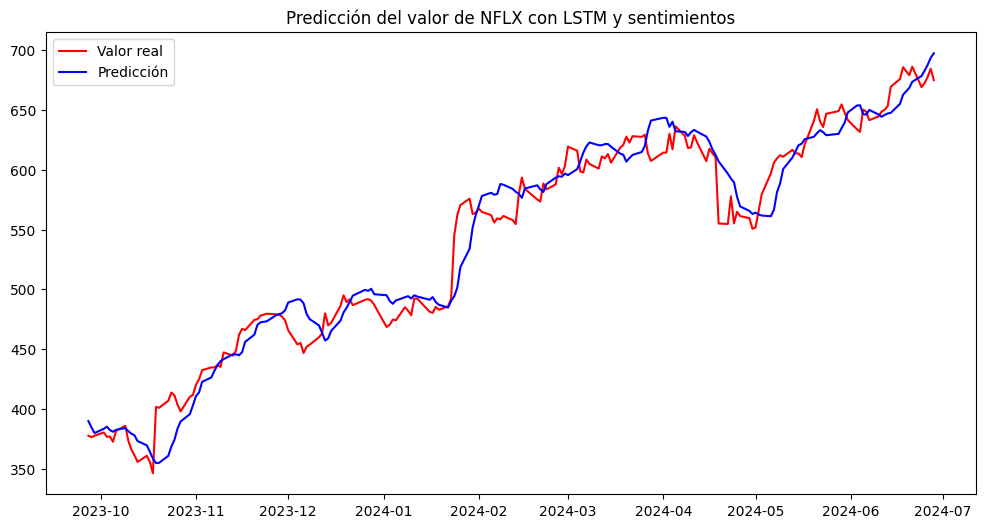

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 43.2 K | train
1 | linear    | Linear  | 101    | train
2 | criterion | MSELoss | 0      | train
----------------------------------------------
43.3 K    Trainable params
0         Non-trainable params
43.3 K    Total params
0.173     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Entrenando modelo para GME...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


M√©tricas para GME:
Mean Squared Error (MSE): 16.942073952886393
Mean Absolute Error (MAE): 3.0527822102734334
R¬≤ Score: 0.49472738074780465


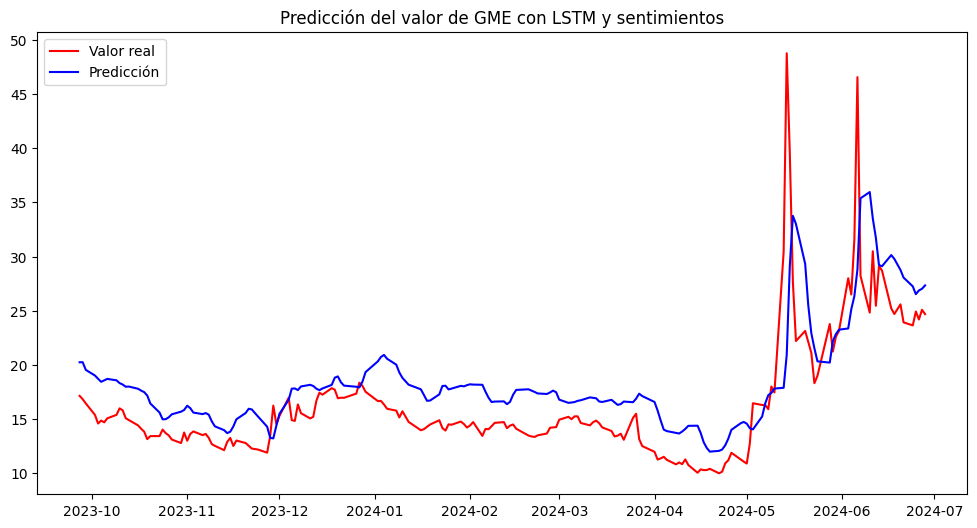

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lista de tickers
tickers = ['AMZN', 'GOOGL', 'NVDA', 'AAPL', 'NFLX', 'GME']

# Descargar datos financieros de m√∫ltiples tickers
def download_data_multiple(tickers):
    datos_acciones = {}
    for ticker in tickers:
        data = yf.download(ticker, start='2020-06-01', end='2024-06-30')
        data['MA_10'] = data['Adj Close'].rolling(window=10).mean()
        data['MA_30'] = data['Adj Close'].rolling(window=30).mean()
        data['MA_60'] = data['Adj Close'].rolling(window=60).mean()
        data.dropna(inplace=True)
        datos_acciones[ticker] = data
    return datos_acciones

# Descargar datos de todas las acciones
datos_acciones = download_data_multiple(tickers)
print(f"Datos descargados para {len(datos_acciones)} acciones.")

# Funci√≥n para a√±adir columnas de sentimiento (simuladas aqu√≠ para ejemplo)
def agregar_sentimientos(datos_acciones):
    for ticker, data in datos_acciones.items():
        # Aqu√≠ puedes reemplazar con los valores reales de sentimiento de noticias y Reddit
        data['sentimiento_noticias'] = np.random.uniform(-1, 1, len(data))
        data['sentimiento_reddit'] = np.random.uniform(-1, 1, len(data))
        datos_acciones[ticker] = data
    return datos_acciones

# A√±adir sentimientos simulados a los datos financieros
datos_acciones = agregar_sentimientos(datos_acciones)

# Clase LSTM en PyTorch Lightning
class LSTMModel(pl.LightningModule):
    def __init__(self, input_size=6, hidden_layer_size=100, output_size=1, lr=0.001):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.lr = lr
        self.criterion = nn.MSELoss()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

# Entrenamiento del modelo LSTM y generaci√≥n de predicciones con m√©tricas
for ticker in tickers:
    print(f"Entrenando modelo para {ticker}...")
    data = datos_acciones[ticker]
    caracteristicas = ['Adj Close', 'MA_10', 'MA_30', 'MA_60', 'sentimiento_noticias', 'sentimiento_reddit']

    # Preprocesar datos de entrenamiento y validaci√≥n
    set_entrenamiento = data.loc[:'2023-06-30', caracteristicas]
    set_validacion = data.loc['2023-07-01':, caracteristicas]

    # Escalado de los datos
    sc = MinMaxScaler(feature_range=(0, 1))
    set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)
    set_validacion_escalado = sc.transform(set_validacion)

    # Preparaci√≥n de los datos para el modelo
    time_step = 60
    X_train, Y_train = [], []
    m = len(set_entrenamiento_escalado)
    for i in range(time_step, m):
        X_train.append(set_entrenamiento_escalado[i-time_step:i])
        Y_train.append(set_entrenamiento_escalado[i, 0])

    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)

    # Crear DataLoader
    train_dataset = TensorDataset(X_train, Y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Crear y entrenar el modelo
    model = LSTMModel(input_size=len(caracteristicas))
    trainer = pl.Trainer(max_epochs=20, logger=False)
    trainer.fit(model, train_loader)

    # Preparar datos de validaci√≥n para la predicci√≥n
    X_test = []
    for i in range(time_step, len(set_validacion_escalado)):
        X_test.append(set_validacion_escalado[i-time_step:i])

    X_test = np.array(X_test)
    X_test = torch.tensor(X_test, dtype=torch.float32)

    # Predicci√≥n
    model.eval()
    with torch.no_grad():
        prediccion = model(X_test).numpy()

    # Desescalar la predicci√≥n
    prediccion = sc.inverse_transform(np.concatenate([prediccion, np.zeros((prediccion.shape[0], len(caracteristicas)-1))], axis=1))[:, 0]

    # Calcular las m√©tricas de evaluaci√≥n
    mse = mean_squared_error(set_validacion['Adj Close'][time_step:], prediccion)
    mae = mean_absolute_error(set_validacion['Adj Close'][time_step:], prediccion)
    r2 = r2_score(set_validacion['Adj Close'][time_step:], prediccion)

    # Mostrar las m√©tricas
    print(f"M√©tricas para {ticker}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R¬≤ Score: {r2}")

    # Graficar las predicciones
    plt.figure(figsize=(12, 6))
    plt.plot(set_validacion.index[time_step:], set_validacion['Adj Close'][time_step:], color='red', label='Valor real')
    plt.plot(set_validacion.index[time_step:], prediccion, color='blue', label='Predicci√≥n')
    plt.title(f"Predicci√≥n del valor de {ticker} con LSTM y sentimientos")
    plt.legend()
    plt.show()


## **MODELO 3. Cambios para optimizar modelo 2**

- Ajuste del tama√±o de las capas ocultas
- Tuning del learning rate
- Incorporar Dropout
- Early Stopping

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings

Datos descargados para 6 acciones.
Entrenando modelo para AMZN...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.024
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.009
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.007
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.005
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.005
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.004
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.004
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.003
INFO:pytorch_lightni

M√©tricas para AMZN:
Mean Squared Error (MSE): 22.59921772302968
Mean Absolute Error (MAE): 3.7593865267664257
R¬≤ Score: 0.9454647389841404


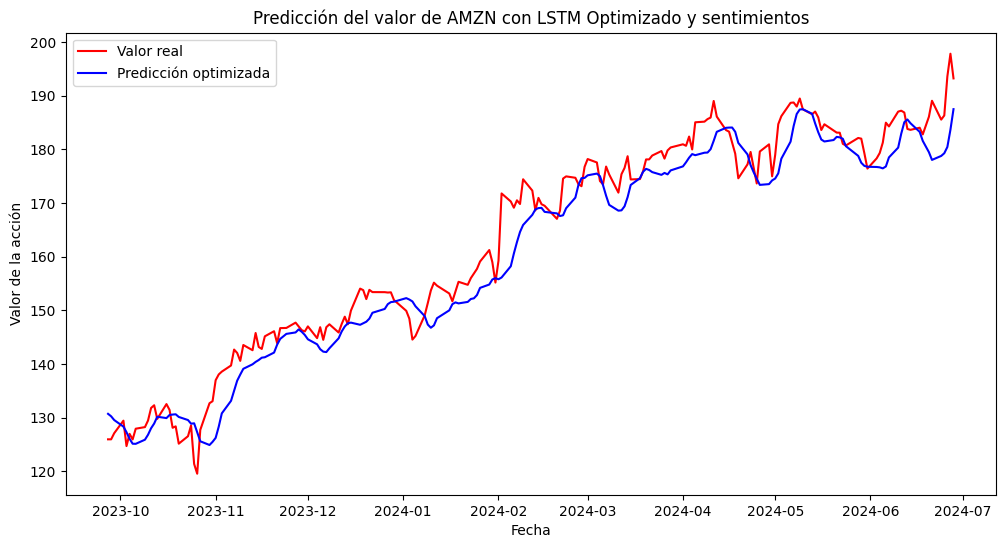

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 69.6 K | train
1 | dropout   | Dropout | 0      | train
2 | linear    | Linear  | 129    | train
3 | criterion | MSELoss | 0      | train
----------------------------------------------
69.8 K    Trainable params
0         Non-trainable params
69

Entrenando modelo para GOOGL...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.012
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.009
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.007
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.007
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.005
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.003
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.002
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.001
INFO:pytorch_lightni

M√©tricas para GOOGL:
Mean Squared Error (MSE): 20.574852074938708
Mean Absolute Error (MAE): 3.7047971060454046
R¬≤ Score: 0.9210010650834347


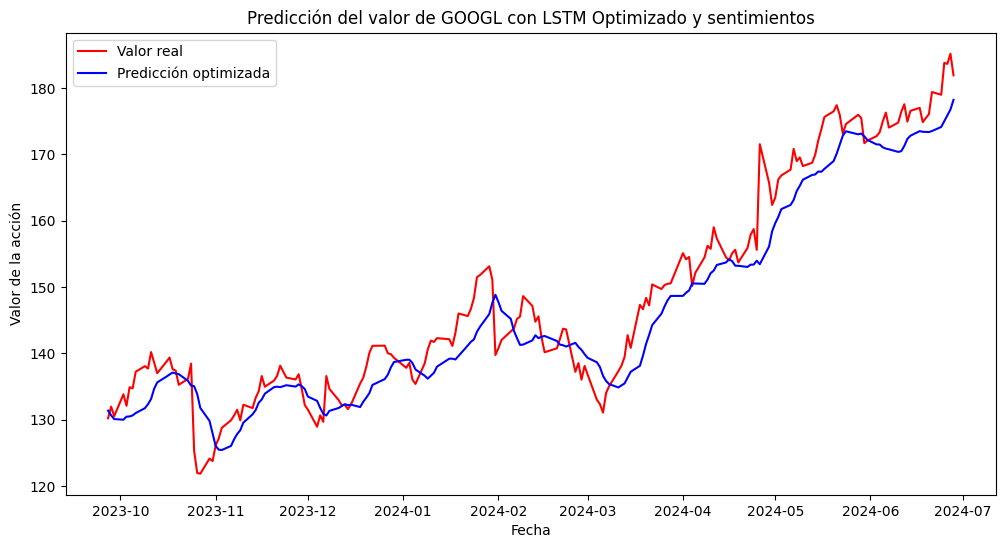

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 69.6 K | train
1 | dropout   | Dropout | 0      | train
2 | linear    | Linear  | 129    | train
3 | criterion | MSELoss | 0      | train
----------------------------------------------
69.8 K    Trainable params
0         Non-trainable params
69

Entrenando modelo para NVDA...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.029
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.0. New best score: 0.002
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.002
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.002
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.001
INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss did not improve in the last 5 records. Best score: 0.001. Signaling Trainer to stop.


M√©tricas para NVDA:
Mean Squared Error (MSE): 193.40701446581673
Mean Absolute Error (MAE): 10.867262687499624
R¬≤ Score: 0.7150952281896412


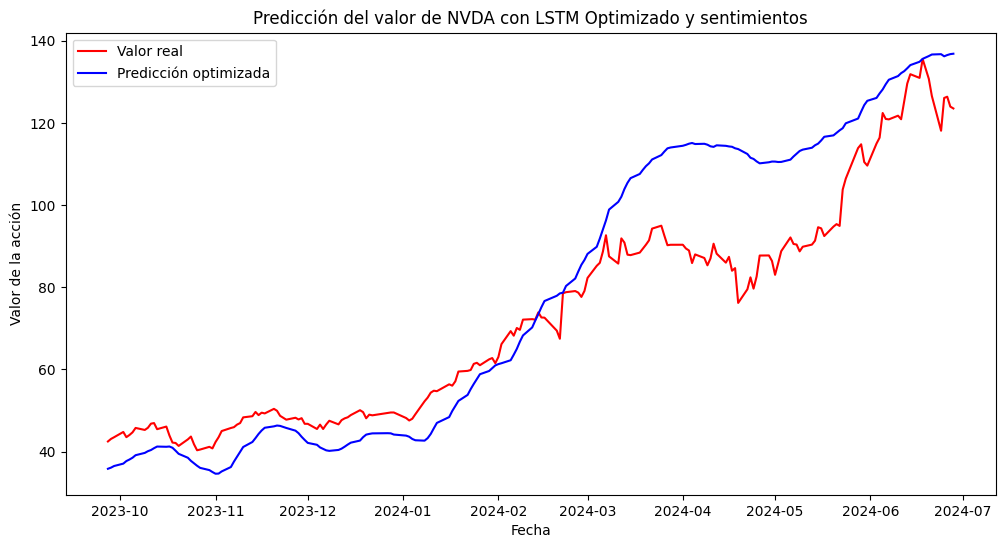

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 69.6 K | train
1 | dropout   | Dropout | 0      | train
2 | linear    | Linear  | 129    | train
3 | criterion | MSELoss | 0      | train
----------------------------------------------
69.8 K    Trainable params
0         Non-trainable params
69

Entrenando modelo para AAPL...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.020
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.016
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.004
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.004
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.003
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.003
INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss did not improve in the last 5 records. Best score: 0.003. Signaling Trainer to stop.


M√©tricas para AAPL:
Mean Squared Error (MSE): 32.634399652583255
Mean Absolute Error (MAE): 4.62200241070784
R¬≤ Score: 0.7589572092505613


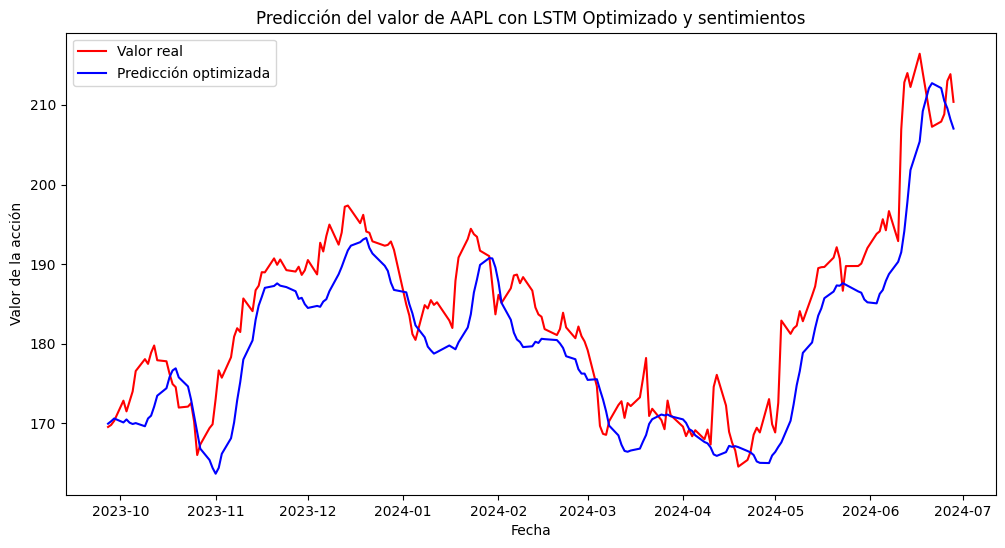

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 69.6 K | train
1 | dropout   | Dropout | 0      | train
2 | linear    | Linear  | 129    | train
3 | criterion | MSELoss | 0      | train
----------------------------------------------
69.8 K    Trainable params
0         Non-trainable params
69

Entrenando modelo para NFLX...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.036
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.0. New best score: 0.009
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.006
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.005
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.001
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.001
INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss did not improve in the last 5 records. Best score: 0.001. Signaling Trainer to stop.


M√©tricas para NFLX:
Mean Squared Error (MSE): 523.1562517421589
Mean Absolute Error (MAE): 17.40937883625706
R¬≤ Score: 0.9380949829298468


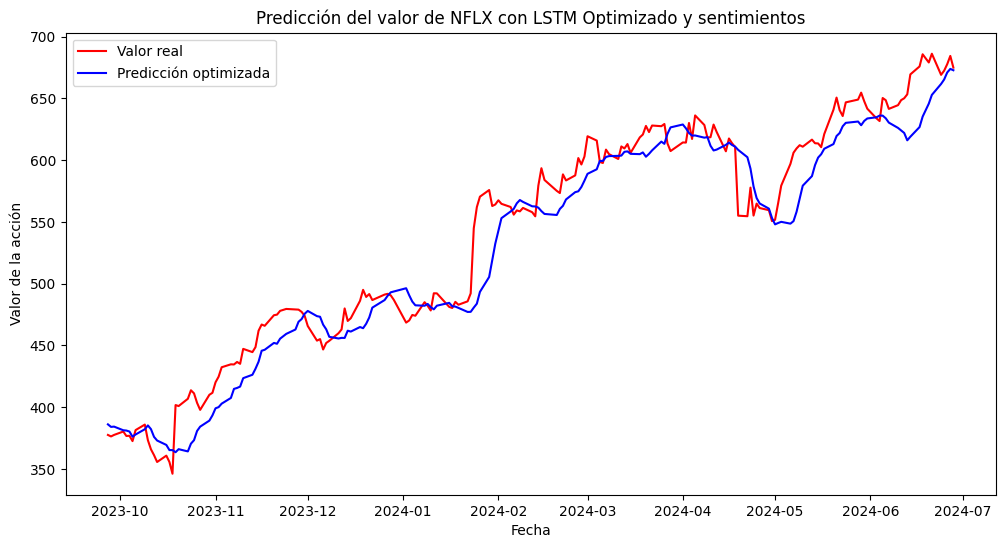

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | lstm      | LSTM    | 69.6 K | train
1 | dropout   | Dropout | 0      | train
2 | linear    | Linear  | 129    | train
3 | criterion | MSELoss | 0      | train
----------------------------------------------
69.8 K    Trainable params
0         Non-trainable params
69

Entrenando modelo para GME...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.017
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.008
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.005
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.003
INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss did not improve in the last 5 records. Best score: 0.003. Signaling Trainer to stop.


M√©tricas para GME:
Mean Squared Error (MSE): 17.141934653078085
Mean Absolute Error (MAE): 2.7738870664719513
R¬≤ Score: 0.4887668271725897


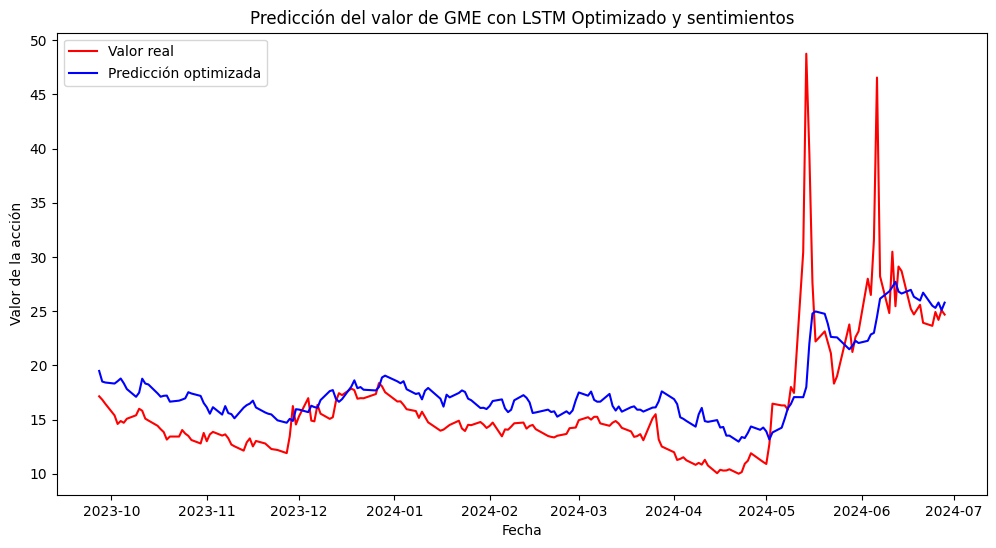

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Modelo LSTM optimizado
class OptimizedLSTMModel(pl.LightningModule):
    def __init__(self, input_size=6, hidden_layer_size=128, output_size=1, lr=0.001, dropout_rate=0.2):
        super(OptimizedLSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.lr = lr
        self.criterion = nn.MSELoss()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout(lstm_out)  # Aplicar dropout
        predictions = self.linear(lstm_out[:, -1])
        return predictions

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5, verbose=True)
        return {
            'optimizer': optimizer,
            'lr_scheduler': {
                'scheduler': scheduler,
                'monitor': 'train_loss'
            }
        }

# Descargar datos financieros de m√∫ltiples tickers
def download_data_multiple(tickers):
    datos_acciones = {}
    for ticker in tickers:
        data = yf.download(ticker, start='2020-06-01', end='2024-06-30')
        data['MA_10'] = data['Adj Close'].rolling(window=10).mean()
        data['MA_30'] = data['Adj Close'].rolling(window=30).mean()
        data['MA_60'] = data['Adj Close'].rolling(window=60).mean()
        data.dropna(inplace=True)
        datos_acciones[ticker] = data
    return datos_acciones

# Lista de tickers
tickers = ['AMZN', 'GOOGL', 'NVDA', 'AAPL', 'NFLX','GME']

# Descargar datos de todas las acciones
datos_acciones = download_data_multiple(tickers)
print(f"Datos descargados para {len(datos_acciones)} acciones.")

# Funci√≥n para a√±adir columnas de sentimiento (simuladas aqu√≠ para ejemplo)
def agregar_sentimientos(datos_acciones):
    for ticker, data in datos_acciones.items():
        data['sentimiento_noticias'] = np.random.uniform(-1, 1, len(data))
        data['sentimiento_reddit'] = np.random.uniform(-1, 1, len(data))
        datos_acciones[ticker] = data
    return datos_acciones

# A√±adir sentimientos simulados a los datos financieros
datos_acciones = agregar_sentimientos(datos_acciones)

# Entrenamiento del modelo LSTM optimizado y generaci√≥n de predicciones con m√©tricas
for ticker in tickers:
    print(f"Entrenando modelo para {ticker}...")
    data = datos_acciones[ticker]
    caracteristicas = ['Adj Close', 'MA_10', 'MA_30', 'MA_60', 'sentimiento_noticias', 'sentimiento_reddit']

    # Preprocesar datos de entrenamiento y validaci√≥n
    set_entrenamiento = data.loc[:'2023-06-30', caracteristicas]
    set_validacion = data.loc['2023-07-01':, caracteristicas]

    # Escalado de los datos
    sc = MinMaxScaler(feature_range=(0, 1))
    set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)
    set_validacion_escalado = sc.transform(set_validacion)

    # Preparaci√≥n de los datos para el modelo
    time_step = 60
    X_train, Y_train = [], []
    m = len(set_entrenamiento_escalado)
    for i in range(time_step, m):
        X_train.append(set_entrenamiento_escalado[i-time_step:i])
        Y_train.append(set_entrenamiento_escalado[i, 0])

    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(X_train, Y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Aplicar Early Stopping para detener el entrenamiento cuando la p√©rdida no mejore
    early_stop_callback = EarlyStopping(
        monitor='train_loss',
        patience=5,
        verbose=True,
        mode='min'
    )

    # Entrenamiento del modelo LSTM optimizado
    model = OptimizedLSTMModel(input_size=len(caracteristicas), hidden_layer_size=128, lr=0.001, dropout_rate=0.2)
    trainer = pl.Trainer(max_epochs=50, logger=False, callbacks=[early_stop_callback])
    trainer.fit(model, train_loader)

    # Preparar datos de validaci√≥n para la predicci√≥n
    X_test = []
    for i in range(time_step, len(set_validacion_escalado)):
        X_test.append(set_validacion_escalado[i-time_step:i])

    X_test = np.array(X_test)
    X_test = torch.tensor(X_test, dtype=torch.float32)

    # Predicci√≥n
    model.eval()
    with torch.no_grad():
        prediccion = model(X_test).numpy()

    # Desescalar la predicci√≥n
    prediccion = sc.inverse_transform(np.concatenate([prediccion, np.zeros((prediccion.shape[0], len(caracteristicas)-1))], axis=1))[:, 0]

    # Calcular las m√©tricas de evaluaci√≥n
    mse = mean_squared_error(set_validacion['Adj Close'][time_step:], prediccion)
    mae = mean_absolute_error(set_validacion['Adj Close'][time_step:], prediccion)
    r2 = r2_score(set_validacion['Adj Close'][time_step:], prediccion)

    # Mostrar las m√©tricas
    print(f"M√©tricas para {ticker}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R¬≤ Score: {r2}")

    # Graficar las predicciones optimizadas
    plt.figure(figsize=(12, 6))
    plt.plot(set_validacion.index[time_step:], set_validacion['Adj Close'][time_step:], color='red', label='Valor real')
    plt.plot(set_validacion.index[time_step:], prediccion, color='blue', label='Predicci√≥n optimizada')
    plt.xlabel('Fecha')
    plt.ylabel('Valor de la acci√≥n')
    plt.title(f'Predicci√≥n del valor de {ticker} con LSTM Optimizado y sentimientos')
    plt.legend()
    plt.show()


### **Conclusion Modelo 3**

Complejizar la red no mejora los resultados, se incrementan los valores de MSE y disminuye r^2